In [1]:
# Installing required Library
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import tensorflow as tf
tf.__version__

2024-05-14 00:05:55.894865: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 00:05:55.937641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.13.1'

In [3]:
from tensorflow.keras.preprocessing.text import one_hot

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [5]:
import pandas as pd

tsv_file = 'train.tsv'
df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)
df.fillna("", inplace=True)
df.columns = ['id','label','title','subjects','author','speaker_job_title','state_info','party_affiliation','count_1', 'count_2','count_3','count_4','count_5', 'context'  ]

count_columns = ['count_1', 'count_2', 'count_3', 'count_4', 'count_5']
df[count_columns] = df[count_columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=count_columns)
df[count_columns] = df[count_columns].astype(int)



In [6]:
print("First five rows of the dataframe:")
print(df.head())


First five rows of the dataframe:
           id        label                                              title  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   

                             subjects          author  \
0  energy,history,job-accomplishments  scott-surovell   
1                      foreign-policy    barack-obama   
2                         health-care    blog-posting   
3                        economy,jobs   charlie-crist   
4                           education       robin-vos   

            speaker_job_title state_info party_affiliation  count_1  count_2  \
0              State delegate   Virginia          democr

# Stats of the Dataset

In [7]:
print(df.describe())


            count_1       count_2       count_3       count_4       count_5
count  10237.000000  10237.000000  10237.000000  10237.000000  10237.000000
mean      11.534336     13.287682     17.135391     16.435870      6.202012
std       18.974349     24.113808     35.847862     36.153089     16.129599
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        2.000000      2.000000      3.000000      3.000000      1.000000
75%       12.000000     12.000000     13.000000     11.000000      5.000000
max       70.000000    114.000000    160.000000    163.000000    105.000000


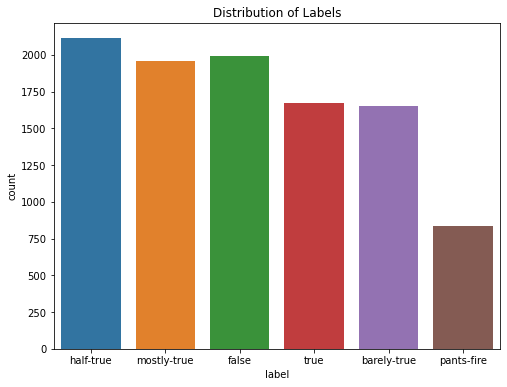

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()


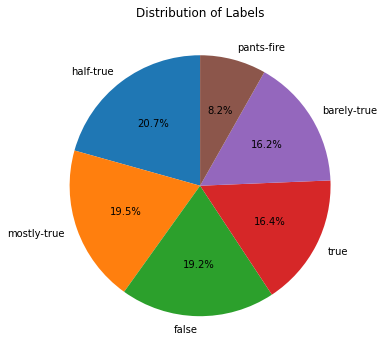

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(df['label'].value_counts(), labels=df['label'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.show()


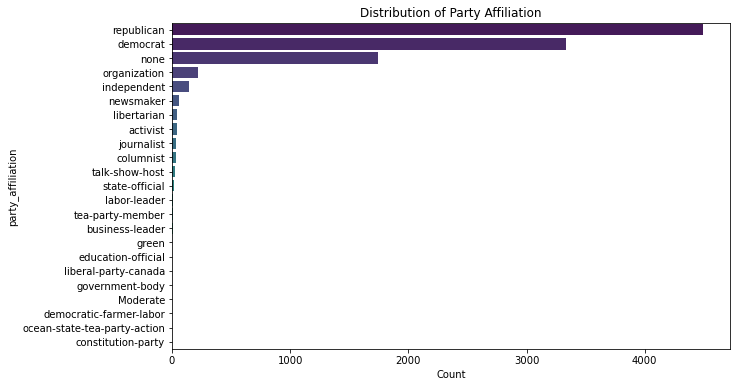

In [10]:
# Bar chart for the distribution of party affiliation
plt.figure(figsize=(10, 6))
sns.countplot(y='party_affiliation', data=df, order=df['party_affiliation'].value_counts().index, palette='viridis')
plt.title('Distribution of Party Affiliation')
plt.xlabel('Count')
plt.show()

In [11]:
df['title'][3]

'The economic turnaround started at the end of my term.'

In [12]:
df['label'] = df['label'].apply(lambda x: 0 if x in ['mostly-true', 'true'] else 1)
df.head()


,id,label,title,subjects,author,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
3,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece


# Dropping the NULL values

In [13]:
df=df.dropna()

In [14]:
X=df.drop('label',axis=1)

In [15]:
y=df['label']

In [16]:
y.value_counts()

1    6599
0    3638
Name: label, dtype: int64

In [17]:
X.shape

(10237, 13)

In [18]:
y.shape

(10237,)

## Installing Required Libraries

In [19]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [21]:
voc_size=5000

In [22]:
messages=X.copy()

In [23]:
messages['title'][96]

'The average student in Florida, what they actually pay out of pocket at our major universities for tuition is as much or less than what they spend on cellphones.'

In [24]:
messages.reset_index(inplace=True)

In [25]:
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])

    # Lowercase
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

print(len(messages))


10237


In [28]:
corpus[0:5]

['declin coal start start natur ga took start begin presid georg w bush administr',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'econom turnaround start end term',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad']

In [29]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]


In [30]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2606  753 3037]
 [   0    0    0 ... 4652 4478  223]
 [   0    0    0 ...  718  225 2823]
 ...
 [   0    0    0 ... 4868 4765 2641]
 [   0    0    0 ... 4570 2639 1784]
 [   0    0    0 ...  713 4286  157]]


In [31]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0, 4128,  709, 3246, 3246, 1253,
       2918, 1621, 3246, 1592, 3745, 3974, 2606,  753, 3037], dtype=int32)

# Creating The Model (LSTM)

In [32]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
print(model.summary())

Model: "sequential"
_________________________________________________________________


2024-05-14 00:06:11.793919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 00:06:11.829151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 00:06:11.833044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [33]:
len(embedded_docs),y.shape

(10237, (10237,))

In [34]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [35]:
X_final.shape,y_final.shape

((10237, 20), (10237,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# **Model Training**


In [37]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64) 

Epoch 1/10


2024-05-14 00:06:13.785475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-05-14 00:06:13.844905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-14 00:06:13.884950: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efc5b74d3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-14 00:06:13.884972: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A10, Compute Capability 8.6
2024-05-14 00:06:13.888964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  1/108 [..............................] - ETA: 2:50 - loss: 0.6926 - accuracy: 0.5781

2024-05-14 00:06:13.999021: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


108/108 [==============================] - 11s 87ms/step - loss: 0.6550 - accuracy: 0.6432 - val_loss: 0.6385 - val_accuracy: 0.6478
Epoch 2/10
108/108 [==============================] - 3s 30ms/step - loss: 0.6036 - accuracy: 0.6772 - val_loss: 0.6340 - val_accuracy: 0.6523
Epoch 3/10
108/108 [==============================] - 2s 17ms/step - loss: 0.5334 - accuracy: 0.7282 - val_loss: 0.6825 - val_accuracy: 0.6378
Epoch 4/10
108/108 [==============================] - 1s 13ms/step - loss: 0.4813 - accuracy: 0.7617 - val_loss: 0.7344 - val_accuracy: 0.6114
Epoch 5/10
108/108 [==============================] - 1s 7ms/step - loss: 0.4299 - accuracy: 0.7929 - val_loss: 0.8150 - val_accuracy: 0.6126
Epoch 6/10
108/108 [==============================] - 1s 7ms/step - loss: 0.3746 - accuracy: 0.8279 - val_loss: 0.9246 - val_accuracy: 0.5963
Epoch 7/10
108/108 [==============================] - 1s 7ms/step - loss: 0.3255 - accuracy: 0.8532 - val_loss: 0.9958 - val_accuracy: 0.5987
Epoch 8/10
1

In [38]:
import matplotlib.pyplot as plt

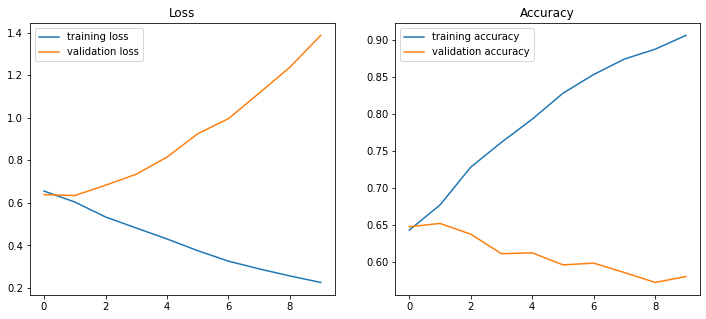

In [39]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


# Saving the model 


In [40]:
model.save('fake_news_predict.h5')

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

106/106 [==============================] - 0s 1ms/step


## Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,y_pred)

array([[ 472,  718],
       [ 699, 1490]])

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

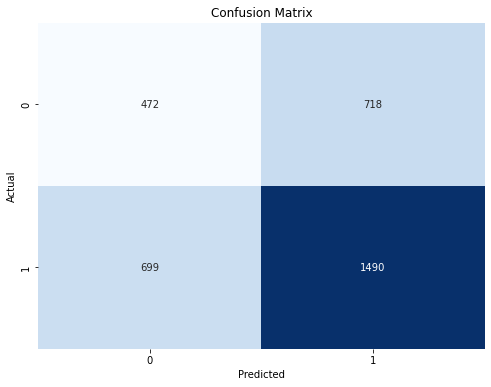

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Accuracy

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5806451612903226

In [48]:
def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review


def predict_statement(statement, model):
    voc_size = 5000
    sent_length = 20

    processed_statement = preprocess_text(statement)
    input_data = [one_hot(processed_statement, voc_size)]
    padded_input = pad_sequences(input_data, padding='pre', maxlen=sent_length)
    prediction = model.predict(np.array(padded_input))
    prediction = (prediction > 0.5).astype(int)

    return prediction[0][0]
# ps = PorterStemmer()

# def preprocess_text(text):
#     review = re.sub('[^a-zA-Z]', ' ', text)
#     review = review.lower().split()
#     review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
#     return ' '.join(review)


# def predict_statement(statement, model):
#     voc_size = 5000
#     sent_length = 20

#     processed_statement = preprocess_text(statement)
#     input_data = [one_hot(processed_statement, voc_size)]
#     padded_input = pad_sequences([input_data], padding='pre', maxlen=sent_length)
#     prediction = model.predict(np.array(padded_input))
#     return int(prediction[0][0] > 0.5)


In [49]:
user_input = """The economic turnaround started at the end of my term."""
result = predict_statement(user_input, model)
if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 20ms/step
The statement is mostly true or true.


In [50]:
from tensorflow.keras.models import load_model
loaded_model = load_model('fake_news_predict.h5')

In [51]:
user_input = """Did you know US population growth is at its lowest since the Great Depression?"""
result = predict_statement(user_input, loaded_model)

if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 220ms/step
The statement is mostly true or true.


In [52]:
user_input = """The average student in Florida, what they actually pay out of pocket at our major universities for tuition is as much or less than what they spend on cellphones."""
result = predict_statement(user_input, loaded_model)

if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 19ms/step
The statement is false or barely true.


# Using Recurrent Neural Networks Model

In [53]:
from tensorflow.keras.layers import SimpleRNN

embedding_vector_features = 40
modelSimpleRNN = Sequential()
modelSimpleRNN.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
modelSimpleRNN.add(SimpleRNN(200))

modelSimpleRNN.add(Dense(1, activation='sigmoid'))
modelSimpleRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelSimpleRNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 200)               48200     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 248401 (970.32 KB)
Trainable params: 248401 (970.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [54]:
history = modelSimpleRNN.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 9s 69ms/step - loss: 0.6585 - accuracy: 0.6394 - val_loss: 0.6497 - val_accuracy: 0.6469
Epoch 2/10
108/108 [==============================] - 3s 30ms/step - loss: 0.5820 - accuracy: 0.6964 - val_loss: 0.6973 - val_accuracy: 0.5934
Epoch 3/10
108/108 [==============================] - 2s 19ms/step - loss: 0.4161 - accuracy: 0.8161 - val_loss: 0.8215 - val_accuracy: 0.5644
Epoch 4/10
108/108 [==============================] - 2s 18ms/step - loss: 0.2336 - accuracy: 0.9102 - val_loss: 1.0366 - val_accuracy: 0.5599
Epoch 5/10
108/108 [==============================] - 2s 15ms/step - loss: 0.1520 - accuracy: 0.9428 - val_loss: 1.2655 - val_accuracy: 0.5762
Epoch 6/10
108/108 [==============================] - 1s 14ms/step - loss: 0.1025 - accuracy: 0.9668 - val_loss: 1.5631 - val_accuracy: 0.5475
Epoch 7/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0685 - accuracy: 0.9783 - val_loss: 1.8324 - val_accuracy: 0.5505

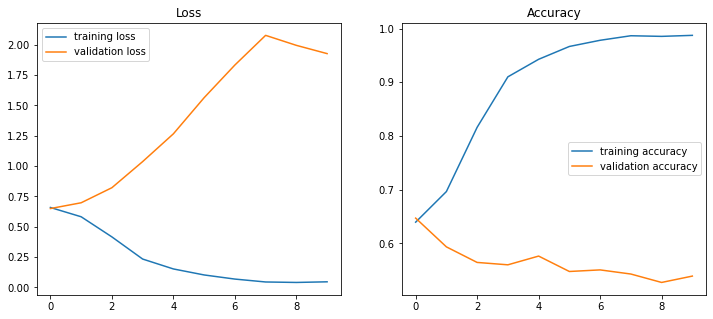

In [55]:

import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='training loss')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='training accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


# GRU Gated Recurrent Unit

In [56]:
from tensorflow.keras.layers import GRU

embedding_vector_features = 50
modelGRU = Sequential()
modelGRU.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
modelGRU.add(GRU(200))
modelGRU.add(Dense(1, activation='sigmoid'))
modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelGRU.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            250000    
                                                                 
 gru (GRU)                   (None, 200)               151200    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 401401 (1.53 MB)
Trainable params: 401401 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [57]:
history = modelGRU.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 10s 85ms/step - loss: 0.6502 - accuracy: 0.6423 - val_loss: 0.6323 - val_accuracy: 0.6505
Epoch 2/10
108/108 [==============================] - 3s 28ms/step - loss: 0.5887 - accuracy: 0.6903 - val_loss: 0.6406 - val_accuracy: 0.6493
Epoch 3/10
108/108 [==============================] - 3s 22ms/step - loss: 0.4931 - accuracy: 0.7547 - val_loss: 0.7551 - val_accuracy: 0.6165
Epoch 4/10
108/108 [==============================] - 1s 11ms/step - loss: 0.4171 - accuracy: 0.8033 - val_loss: 0.8119 - val_accuracy: 0.6144
Epoch 5/10
108/108 [==============================] - 1s 5ms/step - loss: 0.3493 - accuracy: 0.8416 - val_loss: 0.9006 - val_accuracy: 0.6088
Epoch 6/10
108/108 [==============================] - 1s 6ms/step - loss: 0.2856 - accuracy: 0.8747 - val_loss: 1.0861 - val_accuracy: 0.5815
Epoch 7/10
108/108 [==============================] - 1s 7ms/step - loss: 0.2309 - accuracy: 0.9059 - val_loss: 1.2828 - val_accuracy: 0.5886
E

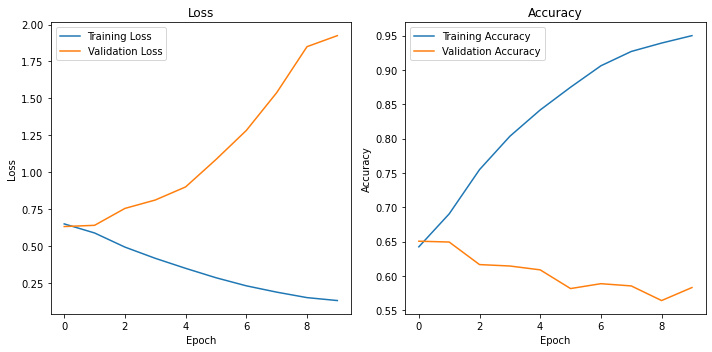

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
modelSimpleRNN.save('fake_news_predict_with_simple_rnn.h5')

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
modelGRU.save('fake_news_predict_with_gru_model.h5')

# **Confusion Matrix for SimpleRNN**

In [61]:
y_pred_prob = modelSimpleRNN.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

106/106 [==============================] - 0s 2ms/step


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [64]:
conf_matrix

array([[ 479,  711],
       [ 847, 1342]])

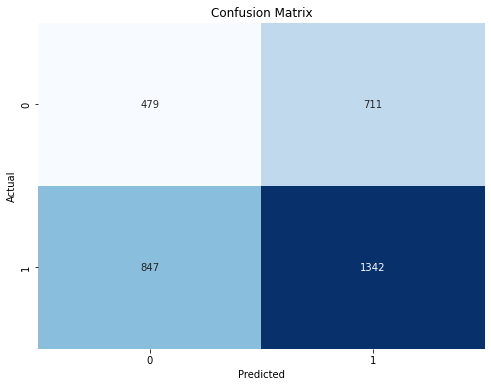

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Accuracy of SimpleRNN**

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5389168393015685

# **Confusion Matrix for GRU Model**

In [67]:
y_pred_prob = modelGRU.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

106/106 [==============================] - 0s 1ms/step


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [70]:
conf_matrix

array([[ 445,  745],
       [ 664, 1525]])

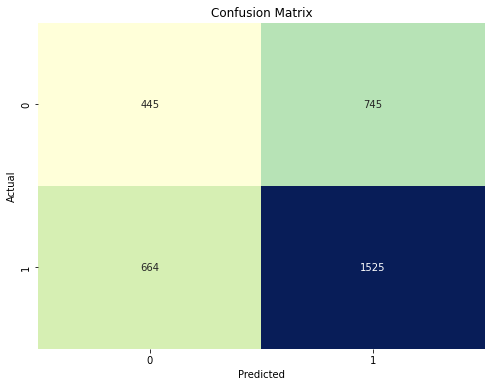

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Accuracy of GRUModel**

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5830127256584788

LSTM has highest accuracy

In [73]:
from tensorflow.keras.models import load_model
import nltk
nltk.download('stopwords')
loaded_model = load_model('fake_news_predict.h5')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import re

def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]  # Stemming and remove stopwords
    review = ' '.join(review)
    return review

def predict_statement(statement, model):
    voc_size = 5000
    sent_length = 20

    processed_statement = preprocess_text(statement)

    input_data = [one_hot(processed_statement, voc_size)]
    padded_input = pad_sequences(input_data, padding='pre', maxlen=sent_length)

    prediction = model.predict(padded_input)

    prediction = (prediction > 0.5).astype(int)

    return prediction[0][0]


In [75]:
def predict_statement(statement, model, threshold=0.7):
    voc_size = 5000
    sent_length = 20
    processed_statement = preprocess_text(statement)

    input_data = [one_hot(processed_statement, voc_size)]
    padded_input = pad_sequences(input_data, padding='pre', maxlen=sent_length)
    prediction = model.predict(padded_input)
    result = 0 if prediction[0][0] < threshold else 1

    return result

user_input = input("Enter a statement: ")

result = predict_statement(user_input, loaded_model)

if result == 0:
    print("The statement is true.")
else:
    print("The statement is false.")


Enter a statement:  Narendra Modi is india prime minister


1/1 [==============================] - 0s 222ms/step
The statement is true.


# Pre Trained Model -> Baris-Yazici Model

In [76]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="baris-yazici/fake_news_classifier_distilbert_cased")

/home/ubuntu/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [78]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("baris-yazici/fake_news_classifier_distilbert_cased")
model = AutoModelForSequenceClassification.from_pretrained("baris-yazici/fake_news_classifier_distilbert_cased")

In [79]:
from transformers import pipeline

pipe = pipeline("text-classification", model="baris-yazici/fake_news_classifier_distilbert_cased")

text = "trump is india prime minister"
prediction = pipe(text)

print(prediction)


[{'label': 'false', 'score': 0.351296603679657}]


In [80]:
text = "Trump is USA president"
prediction = pipe(text)

print(prediction)


[{'label': 'false', 'score': 0.32383331656455994}]


# BERT Transformer

In [81]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Maximum sequence length for BERT
max_length = 128

# Example sentence
sentences = ["your input sentences here"]

# Tokenize input sentences
input_ids = []
attention_masks = []

for sentence in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        add_special_tokens = True,
                        max_length = max_length,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'tf',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

bert_model = TFBertModel.from_pretrained('bert-base-uncased')

bert_model.trainable = False

input_ids_input = Input(shape=(max_length,), dtype='int32', name='input_ids')
attention_masks_input = Input(shape=(max_length,), dtype='int32', name='attention_masks')

bert_output = bert_model([input_ids_input, attention_masks_input])[1]  # Taking the pooled output

output = Dense(1, activation='sigmoid')(bert_output)

model_bert = Model(inputs=[input_ids_input, attention_masks_input], outputs=output)

model_bert.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_bert.summary())


/home/ubuntu/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ubuntu/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max len

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_masks (InputLaye  [(None, 128)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_masks[0][0]']     
                             hidden_state=(None, 128, 7                                       

In [82]:
history = modelGRU.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 1s 9ms/step - loss: 0.1058 - accuracy: 0.9621 - val_loss: 2.3687 - val_accuracy: 0.5780
Epoch 2/10
108/108 [==============================] - 1s 7ms/step - loss: 0.0933 - accuracy: 0.9653 - val_loss: 2.2237 - val_accuracy: 0.5774
Epoch 3/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0697 - accuracy: 0.9742 - val_loss: 2.6713 - val_accuracy: 0.5875
Epoch 4/10
108/108 [==============================] - 1s 8ms/step - loss: 0.0588 - accuracy: 0.9780 - val_loss: 2.8729 - val_accuracy: 0.5780
Epoch 5/10
108/108 [==============================] - 1s 7ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 3.2223 - val_accuracy: 0.5632
Epoch 6/10
108/108 [==============================] - 1s 6ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 3.1770 - val_accuracy: 0.5738
Epoch 7/10
108/108 [==============================] - 1s 5ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 3.4901 - val_accuracy: 0.5833
Epoch 

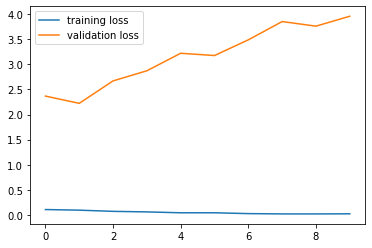

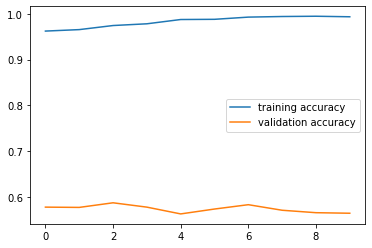

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

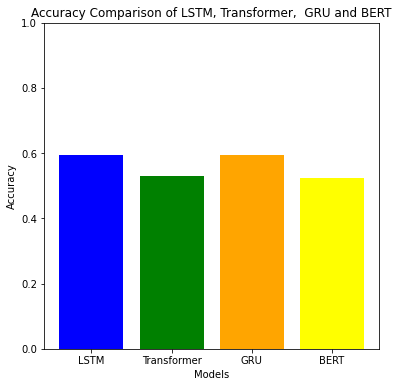

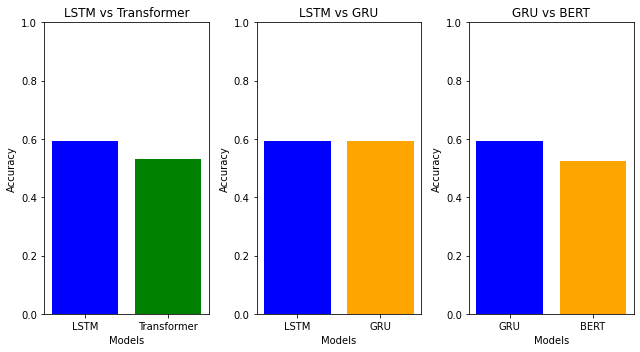

In [84]:
lstm_acc = 0.5942586564072211
transformer_acc = 0.53
gru_acc = 0.5945546019532406
bert_acc= 0.5234

import matplotlib.pyplot as plt

models = ['LSTM', 'Transformer', 'GRU' , 'BERT']
accuracy_values = [lstm_acc, transformer_acc, gru_acc, bert_acc]

# Plotting all at once
plt.figure(figsize=(6, 6))
plt.bar(models, accuracy_values, color=['blue', 'green', 'orange','yellow'])
plt.title('Accuracy Comparison of LSTM, Transformer,  GRU and BERT')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

axes[0].bar(['LSTM', 'Transformer'], [lstm_acc, transformer_acc], color=['blue', 'green'])
axes[0].set_title('LSTM vs Transformer')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

axes[1].bar(['LSTM', 'GRU'], [lstm_acc, gru_acc], color=['blue', 'orange'])
axes[1].set_title('LSTM vs GRU')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)

axes[2].bar(['GRU' , 'BERT'], [gru_acc, bert_acc], color=['blue', 'orange'])
axes[2].set_title('GRU vs BERT')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()